In [1]:
from pandas import read_csv, concat
from funciones import ids, unicidad_sistema, unicidad_modelo, barplot

identity = read_csv("C:\\Users\\palej\\Desktop\\FIUBA\\Organizacion de datos\\TP\\identity_features_train.csv")
transactions = read_csv("C:\\Users\\palej\\Desktop\\FIUBA\\Organizacion de datos\\TP\\transactions_train.csv")

In [ ]:
#                   ANALISIS    POR     TIPOS       DE      DISPOSITIVOS

In [2]:
#   Cuarto analisis
analisis_fraude = identity[ ids(transactions[ transactions["target"] == 1 ]["Id"].to_list(), identity["Id"].to_list()) ][ ["feature31", "Device", "DeviceMetadata"] ]

In [3]:
analisis_legal = identity[ ids(transactions[ transactions["target"] == 0 ]["Id"].to_list(), identity["Id"].to_list()) ][ ["feature31", "Device", "DeviceMetadata"] ]

In [4]:
analisis_fraude["Transaccion"] = "Fraude"

In [5]:
analisis_legal["Transaccion"] = "Legal"

In [6]:
analisis = concat([analisis_fraude, analisis_legal])

In [7]:
analisis = analisis.fillna("Otro")

In [8]:
analisis = analisis.rename(columns={"feature31":"Modelo", "Device":"Dispositivo", "DeviceMetadata":"Sistema"})

In [9]:
analisis

,Modelo,Dispositivo,Sistema,Transaccion
52,chrome 54.0 for android,mobile,Redmi Note 4 Build/MMB29M,Fraude
53,chrome 54.0 for android,mobile,Redmi Note 4 Build/MMB29M,Fraude
54,chrome 54.0 for android,mobile,Redmi Note 4 Build/MMB29M,Fraude
69,chrome 62.0 for ios,mobile,Otro,Fraude
86,firefox,desktop,rv:52.0,Fraude
...,...,...,...,...
125555,safari generic,desktop,Otro,Legal
125557,chrome generic,desktop,Windows,Legal
125560,chrome generic,desktop,Windows,Legal
125563,chrome 65.0,desktop,Windows,Legal


In [ ]:
#                   ANALISIS        DE      DISPOSITIVOS

In [10]:
analisis_dispositivo = analisis.pivot_table(values="Sistema", index="Dispositivo", columns="Transaccion", aggfunc="count")

In [11]:
analisis_dispositivo["Promedio de fraude en %"] = round(analisis_dispositivo["Fraude"] * 100 / (analisis_dispositivo["Fraude"] + analisis_dispositivo["Legal"]), 2)

In [12]:
analisis_dispositivo["Promedio de legal en %"] = round(analisis_dispositivo["Legal"] * 100 / (analisis_dispositivo["Fraude"] + analisis_dispositivo["Legal"]), 2)

In [13]:
analisis_dispositivo = analisis_dispositivo.reset_index()

In [14]:
analisis_dispositivo

Transaccion,Dispositivo,Fraude,Legal,Promedio de fraude en %,Promedio de legal en %
0,Otro,71,2866,2.42,97.58
1,desktop,4758,69946,6.37,93.63
2,mobile,4726,43198,9.86,90.14


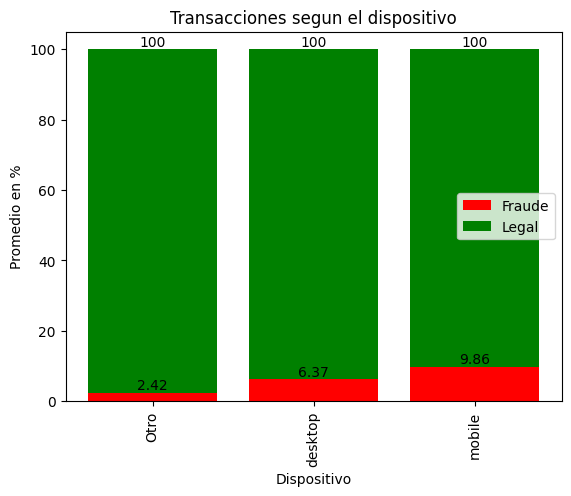

In [15]:
barplot(analisis_dispositivo["Dispositivo"], (analisis_dispositivo["Promedio de fraude en %"], analisis_dispositivo["Promedio de legal en %"]), "Transacciones segun el dispositivo", "Dispositivo", "Promedio en %", True)

In [ ]:
#                   ANALISIS        DE      SISTEMAS

In [16]:
analisis_sistema = analisis.pivot_table(values="Dispositivo", index="Sistema", columns="Transaccion", aggfunc="count")

In [17]:
analisis_sistema = analisis_sistema.fillna(0)

In [18]:
analisis_sistema = analisis_sistema.reset_index()

In [19]:
analisis_sistema["Unicidad de sistemas"] = analisis_sistema.Sistema.map(unicidad_sistema)

In [20]:
analisis_sistema.describe()

Transaccion,Fraude,Legal
count,1682.000000,1682.000000
mean,5.680737,68.971463
std,89.666012,1175.644212
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,4.000000
75%,0.000000,9.000000
max,2607.000000,38715.000000


In [21]:
analisis_sistema = analisis_sistema.groupby("Unicidad de sistemas").sum()

In [22]:
analisis_sistema.pop("Sistema")

Unicidad de sistemas
ALCATEL       ALCATELALCATEL ONE TOUCH 5036A Build/JDQ39ALCA...
BUILD         2PS64 Build/NRD90M4013M Build/KOT49H4027A Buil...
GT            GT-I8190L Build/JZO54KGT-I8190NGT-I8200NGT-I90...
IOS DEVICE                                           iOS Device
IPHONE                                                   iPhone
LG            LG-D213LG-D320LG-D320 Build/KOT49I.V10aLG-D331...
MACOS                                                     MacOS
MOTO          MotoMoto C Build/NRD90M.046Moto C Build/NRD90M...
NOKIA                                                     NOKIA
OTRO          0PAJ50PJA20PM921016S2PQ932PYB22PZC54003A4009F4...
RV            rv:11.0rv:14.0rv:29.0rv:31.0rv:33.0rv:35.0rv:3...
SAMSUNG       SAMSUNGSAMSUNG SM-A300H Build/LRX22GSAMSUNG SM...
SM            SM-A300FU Build/MMB29MSM-A300HSM-A300H Build/L...
WINDOWS                     WindowsWindows NT 6.1Windows NT 6.2
ZTE           ZTEZTE A2017U Build/NRD90MZTE BLADE A321 Build...
Name: Sistema, dtyp

In [23]:
analisis_sistema["Promedio fraude en %"] = round(analisis_sistema.Fraude * 100 / (analisis_sistema.Fraude + analisis_sistema.Legal), 1)

In [24]:
analisis_sistema["Promedio legal en %"] = round(analisis_sistema.Legal * 100 / (analisis_sistema.Fraude + analisis_sistema.Legal), 1)

In [25]:
analisis_sistema = analisis_sistema.reset_index()

In [26]:
analisis_sistema

Transaccion,Unicidad de sistemas,Fraude,Legal,Promedio fraude en %,Promedio legal en %
0,ALCATEL,7.0,46.0,13.2,86.8
1,BUILD,1035.0,5233.0,16.5,83.5
2,GT,20.0,113.0,15.0,85.0
3,IOS DEVICE,1079.0,16571.0,6.1,93.9
4,IPHONE,1.0,0.0,100.0,0.0
5,LG,242.0,1962.0,11.0,89.0
6,MACOS,218.0,11054.0,1.9,98.1
7,MOTO,377.0,2021.0,15.7,84.3
8,NOKIA,10.0,0.0,100.0,0.0
9,OTRO,2484.0,27519.0,8.3,91.7


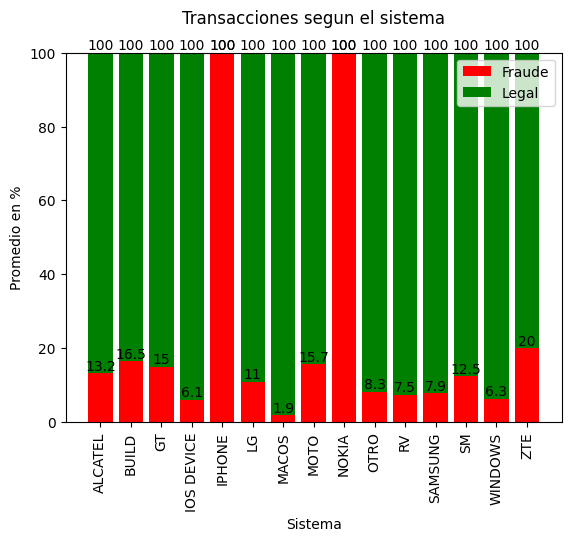

In [27]:
barplot(analisis_sistema["Unicidad de sistemas"], (analisis_sistema["Promedio fraude en %"], analisis_sistema["Promedio legal en %"]), "Transacciones segun el sistema\n", "Sistema", "Promedio en %", True)

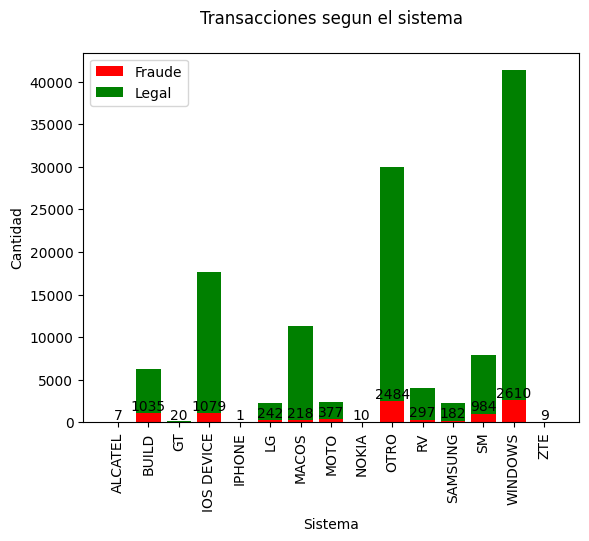

In [28]:
barplot(analisis_sistema["Unicidad de sistemas"], (analisis_sistema["Fraude"], analisis_sistema["Legal"]), "Transacciones segun el sistema\n", "Sistema", "Cantidad", False)

In [ ]:
#                   ANALISIS        DE      MODELOS

In [29]:
analisis_modelo = analisis.pivot_table(values="Dispositivo", index="Modelo", columns="Transaccion", aggfunc="count")

In [30]:
analisis_modelo = analisis_modelo.fillna(0)

In [31]:
analisis_modelo = analisis_modelo.reset_index()

In [32]:
analisis_modelo["Unicidad de modelos"] = analisis_modelo.Modelo.map(unicidad_modelo)

In [33]:
analisis_modelo = analisis_modelo.groupby("Unicidad de modelos").sum()

In [34]:
analisis_modelo.pop("Modelo")

Unicidad de modelos
ANDROID    Generic/AndroidGeneric/Android 7.0androidandro...
CHROME     chromechrome 43.0 for androidchrome 46.0 for a...
EDGE                edgeedge 13.0edge 14.0edge 15.0edge 16.0
FIREFOX    Mozilla/Firefoxfirefoxfirefox 47.0firefox 48.0...
OPERA                 operaopera 49.0opera 51.0opera generic
OTRO       BLU/DashCherryInco/MinionLG/K-200Lanix/IliumM4...
SAFARI     mobile safari 10.0mobile safari 11.0mobile saf...
SAMSUNG    Samsung/SCHSamsung/SM-G531HSamsung/SM-G532Msam...
Name: Modelo, dtype: object

In [35]:
analisis_modelo["Promedio fraude en %"] = round(analisis_modelo.Fraude * 100 / (analisis_modelo.Fraude + analisis_modelo.Legal), 1)

In [36]:
analisis_modelo["Promedio legal en %"] = round(analisis_modelo.Legal * 100 / (analisis_modelo.Fraude + analisis_modelo.Legal), 1)

In [37]:
analisis_modelo = analisis_modelo.reset_index()

In [38]:
analisis_modelo

Transaccion,Unicidad de modelos,Fraude,Legal,Promedio fraude en %,Promedio legal en %
0,ANDROID,92.0,358.0,20.4,79.6
1,CHROME,6158.0,60081.0,9.3,90.7
2,EDGE,177.0,4624.0,3.7,96.3
3,FIREFOX,470.0,5830.0,7.5,92.5
4,OPERA,129.0,207.0,38.4,61.6
5,OTRO,319.0,12001.0,2.6,97.4
6,SAFARI,2052.0,31151.0,6.2,93.8
7,SAMSUNG,158.0,1758.0,8.2,91.8


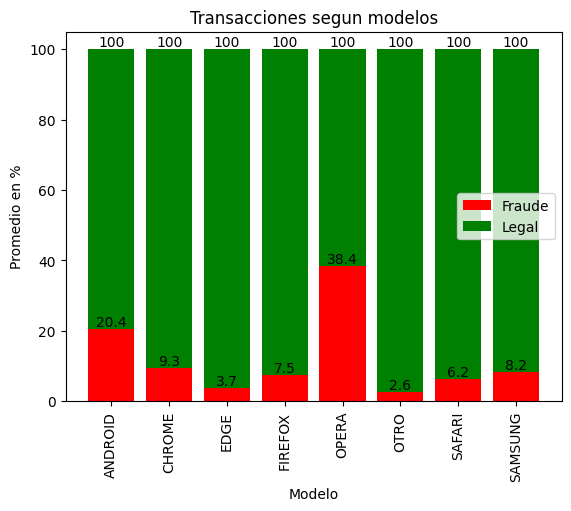

In [39]:
barplot(analisis_modelo["Unicidad de modelos"], (analisis_modelo["Promedio fraude en %"], analisis_modelo["Promedio legal en %"]), "Transacciones segun modelos", "Modelo", "Promedio en %", True)

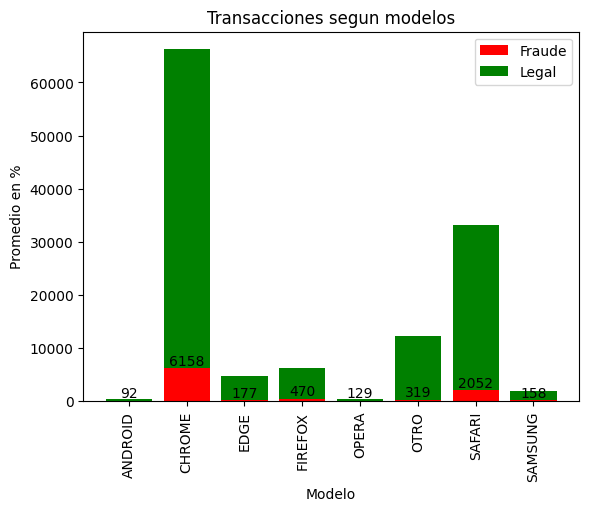

In [40]:
barplot(analisis_modelo["Unicidad de modelos"], (analisis_modelo["Fraude"], analisis_modelo["Legal"]), "Transacciones segun modelos", "Modelo", "Promedio en %", False)